<h1>Ziyi "Jason" Lan's Warmup Project Data Exploration</h1>

First, I'll import the training data and necessary packages.

In [11]:
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas import Series,DataFrame

data = pd.read_csv('train.csv')

print data.head()
print data.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
       P

Then we can check for missing data with the isnull() function:

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, a lot of information about which carbin is the pessanger in is missed and it shouldn't be considered much. 

Now that we have set up the environment, we can start doing some basic analysis of the data. 

<h2>I Survival rate between male and female</h2>

In [13]:
women = data[data.Sex == "female"]
men = data[data.Sex == "male"]

print "Women: ", women.Survived.mean()
print "Man: ", men.Survived.mean()

Women:  0.742038216561
Man:  0.188908145581


<h2>II Survial rate among different classes</h2> 

In [14]:
first = data[data.Pclass == 1]
second = data[data.Pclass == 2]
third = data[data.Pclass == 3]

print "First Class: ", first.Survived.mean()
print "Second Class: ", second.Survived.mean()
print "Third Class: ", third.Survived.mean()

First Class:  0.62962962963
Second Class:  0.472826086957
Third Class:  0.242362525458


<h2>III Survival rate between different ages</h2>

In [15]:
child = data[data.Age <= 18]
adult = data[data.Age > 18]
old = data[data.Age > 55]

print "Children: ", child.Survived.mean()
print "Adult: ", adult.Survived.mean()
print "Old People: ", old.Survived.mean()

Children:  0.503597122302
Adult:  0.382608695652
Old People:  0.3


<h2>IV Survival rate bewteen women of different ages</h2>

In [16]:
girl = women[women.Age < 18]
women = women[women.Age > 18]
old_women = women[women.Age > 55]

print "Girl:   ", girl.Survived.mean()
print "Women:   ", women.Survived.mean()
print "Old Women:   ", old_women.Survived.mean()


Girl:    0.690909090909
Women:    0.782383419689
Old Women:    0.888888888889


<h2>V Graph for Sruvial Number of All Ages</h2>

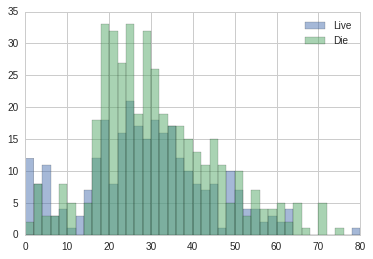

In [17]:
plt.hist(data.Age[data.Survived== 1], bins=np.arange(0, 82, 2), alpha=.5)
plt.hist(data.Age[data.Survived== 0], bins=np.arange(0, 82, 2), alpha=.5)
plt.legend(['Live', 'Die'])
plt.show()

<h2>VI Scatter Plot of Fare vs Survival</h2>

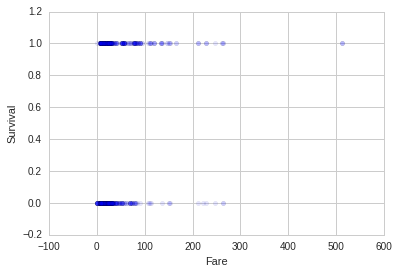

In [18]:
%matplotlib inline
plt.scatter(data.Fare, data.Survived, alpha = 0.1)
plt.xlabel('Fare')
plt.ylabel('Survival')
plt.show()